#  Práctica 2 - Métodos de Taylor
## Zhong, Wenya, Gil Molina, Ana
    

Construir un procedimiento **DESOLVE_TAYLOR** que calcule una solución numérica para una ecuación diferencial de la forma
$$\frac{dy}{dx} = f(x,y) \qquad \text{con c.i.} \quad y(x_0)=y_0$$
sobre un intervalo $[a,b]$, tal que $x_0 \in [a,b]$,  utilizando el método de Taylor de un orden dado n. El paso puede ser de tamaño constante or variable.

Cuando se utilize paso variable, el error cometido al usar el método  de Taylor de orden n para un paso particular se estima combinando las soluciones de orden n+1 y de orden n de la serie de Taylor siguiendo el esquema de pares encajados según se ha visto en clase mediante el control adaptativo del tamaño del paso.
El valor que se devuelve es el dado por la serie de orden n.

## DESOLVE_TAYLOR: USO

## <font color='magenta'> **Secuencia de llamada:**  </font> 

    DESOLVE_TAYLOR( pvi, rng ) 

**Parámetros:**
   
     pvi =  [f, ci] =  donde f es la función que define el PVI={y'=f(x,y), y(x0)=y0} y ci es 
                la condición inicial [x0,y0] 
     rng   =  [a,b] un intervalo conteniendo el valor inicial x0 de la variable independiente 
                (Se ha de preveer que x0 puede estar en el interior del intervalo).
**Descripción:**

El procedimiento DESOLVE_TAYLOR usa el metodo de las series de Taylor de orden dado para encontrar una solución numérica en rng al PVI dado.

La solución numérica se dara como un array de puntos $[x_i,y_i]$ que aproximan la solución del PVI.
Se puede elegir tamaño de paso constante o variable. En el caso de paso variable, se usará un método adaptativo para el tamaño del paso como medida de control del error.

## <font color='magenta'> **Opciones:**  </font>  

### <font color='magenta'> *Opciones para ambos casos (paso fijo y variable)*: </font>  


<font color='blue'>**stepsize=fijo/variable** </font>

Con la opción "stepsize=fijo", la solución numérica se construye con valores de x equiespaciados.
Con la opción "stepsize=variable", el tamaño del paso se controla estimando el error en cada paso. La opción por defecto es "stepsize=variable".

<font color='blue'> **orden=n** </font>

El orden del método de la serie de Taylor.
Por defecto "orden = 4 ".

<font color='blue'> **info=0, 1, 2, 3, 4**</font>

Con la opción _"info=0"_ no se imprime nada en pantalla durante el cómputo de la solución númerica.

Con la opción _"info=1"_ se imprimen las fórmulas de las distintas derivadas que se utilizan, y en caso de paso variable, el número total de pasos.

Con la opción _"info=2"_ se imprime el metodo y la información de los pasos que forman la solución numérica, y en el caso de paso variable, según se van calculando (x,y,h,error,q) cuando se alcanzan la tolerancia, y el número total de pasos.

Con la opción "_info=3_" se imprime la información de los casos anteriores, y en el caso de paso variable los valores (h,error, q) de los pasos intermedios.

Con la opción _"info=4"_ la única impresión en pantalla será el número total de pasos usados para el caso de paso variable.

<font color='blue'> **grafica=si/no**</font>  <font color='red'> **[OPCIONAL]**</font>

Si _"gráfica=si"_ se mostrará en pantalla la representación gráfica de la solución numérica. 
Si  _"gráfica=no"_ no se mostrará representación gráfica alguna.

La opción por defecto es _"gráfica=no"_.


### <font color='magenta '>*Opciones sólo para paso fijo:*  </font>

<font color='blue'> **pasos=n**  </font>

El número de pasos a utilizar para cubrir el intervalo. El número de pasos por defecto es 20.

### <font color='magenta '> *Opciones sólo para paso variable:* </font>

<font color='blue'> **hini=h**  </font>  

El tamaño de paso para el primer intento de paso. Por defecto es "hini =$10^{-4}$".

<font color='blue'> **hmax=h**  </font>

El tamaño máximo de paso. Por defecto es "hmax=orden*0.5".

<font color='blue'> **hmin=h**  </font>  

El tamaño mínimo de paso. Por defecto es "hmin=min(0.05*orden, $\frac{hini}{2000}$ )".

Nota: hini debe estar comprendido entre hmin y hmax.

<font color='blue'> **maxsteps=n**  </font>

El numero máximo de pasos a utilizar. Se produce un mensaje de error si el número máximo de pasos se alcanza antes de alcanzar el final del intervalo sobre el que queremos calcular la solución. Por defecto es _"maxsteps=2000"_.

<font color='blue'> **tolerancia=n** </font> 

El tamaño del paso se elige adaptativamente intentando asegurar que el error local para cada paso no sea
mayor que $10^{-n}$.
Por defecto es _"tolerancia=4"_.

<font color='blue'> **sol=n1**</font> 


Si _sol=n1_ la estimación del error se hace para el método de orden _n_ dado, pero la solución numérica que se devuelve es la de orden _n+1_ sin que ello suponga un incremento del coste computacional. 


In [100]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import sys

def FACTORIAL(n):
    if n == 0:
        return 1
    else:
        return n*FACTORIAL(n-1)

def DERIVADA(f,orden):   
    der = f
    f1=f
    for i in range(0,orden-1):
        f1=simplify(f1.diff(x)+f1.diff(y)*f)
        der=np.append(der,f1)    
    return der

x=Symbol('x')
y=Symbol('y')

f= x**2+y

DERIVADA(f,3)

array([x**2 + y, x**2 + 2*x + y, x**2 + 2*x + y + 2], dtype=object)

## Pseudocódigo del algotimo para paso variable



### Pseudocódigo del algoritmo
 
>    Input: [f,ci], [a,b], opciones
>
>        Lectura de datos
>        Lectura, comprobación y valores por defecto de las opciones generales
>
>        Taylor para paso fijo:
>
>            Lectura, comprobación y valores por defecto de las opciones para paso fijo
>
>            Cálculo de derivadas usando la función DERIVADA
>
>            h = (b-a)/pasos
>
>            Cálculo del nodo más próximo a x0 y traslado de y0 al nodo
>            k = posición del nodo más próximo
>
>            S1 = array de 0
>            S1[0,:] = [xk,yk]
>
>            for i = 1,..., pasos+1-k:
>                phi=0
>                for j = 1,..., orden+1:
>                    phi += h**(j-1)/FACTORIAL(j)*der[j-1](S1[i-1,0],S1[i-1,1])
>                S1[i,:]=[S1[i-1,0]+h,S1[i-1,1]+h*phi]
>
>            si k=0 entonces:
>                S = S1
>            si no hacer lo mismo para S2 pero con i = 1,..., k+1 y cambiando h por -h
>                S = concatenar(S2 (dado la vuelta), S1)
>
>        Taylor para paso variable:
>
>            Lectura, comprobación y valores por defecto de las opciones para paso variable
>
>            Cálculo de derivadas usando la función DERIVADA
>
>            si sol == "n1" entonces:
>                n = orden + 1
>            si no:
>                n = orden
>
>            S1 = [[x0,y0]]
>            h = hini
>            i = 0
>
>            while S1[i][0] < b:
>                si i >= maxsteps entonces ERROR
>
>                E = abs(h**(orden)/FACTORIAL(orden+1)*der[orden](S1[i][0],S1[i][1]))
>                while E >= tol:
>
>                    q = 0.9*(tol/E)**(1/orden)
>                    si q <= 0.1:
>                        q = 0.1
>                    si q >= 4:
>                        q = 4
>
>                    si hmin > q*h:
>                        h = hmin
>                    si hmax < q*h:
>                        h = hmax
>                    si no:
>                        h = q*h
>                
>                    E = abs(h**(orden)/FACTORIAL(orden+1)*der[orden](S1[i][0],S1[i][1]))
>
>                phi = 0
>                for j = 1,..., n+1:
>                    phi += h**(j-1)/FACTORIAL(j)*der[j-1](S1[i][0],S1[i][1])
>                S1.append([S1[i][0]+h,S1[i][1]+h*phi])
>
>                Actualizar q y h igual que antes
>
>                i += 1
>
>            Tomar h = b-S1[i-1][0] y dar el último paso
>            contador = i
>
>            Lo mismo para S2 pero mientras S2[i][0] > a y cambiando h por -h
>            contador += i
>
>            Convertir S1 y S2 a arrays
>            S = concatenar(S2 (dado la vuelta), S1)
>
>    Output: S

## Programación del algoritmo


In [101]:

def DESOLVE_TAYLOR(pvi, rng, **kwargs):
    '''Función que usa el método de las series de Taylor de orden dado
    para hallar una solución numérica en rng del PVI.
    
    Parámetros a introducir:
     pvi = [f, ci] = donde f es la función que define el PVI={y'=f(x,y), y(x0)=y0} y ci es la condición inicial [x0,y0] 
     rng = [a,b] un intervalo conteniendo el valor inicial x0 de la variable independiente'''
    
    # Lectura de datos
    f = pvi[0]; ci = pvi[1]
    a = rng[0]; b = rng[1]
    x0 = ci[0]; y0 = ci[1]
    
    # Lectura de opciones generales
    stepsize=kwargs.get("stepsize")
    orden=kwargs.get("orden")
    info=kwargs.get("info")
    grafica=kwargs.get("grafica")
        
    # Asignación de valores por defecto
    opc=[k for k in kwargs]
    if not "stepsize" in opc:
        stepsize="variable"
    if not "orden" in opc:
        orden=4
    if not "info" in opc:
        info=0
    if not "grafica" in opc:
        grafica="no"
        
    # Comprobaciones
    if not isinstance(f, Expr):
        sys.exit('Error: f no es una función simbólica.')
        
    if type(orden) != int or orden <= 0:
        sys.exit('Error: el orden introducido "{0}" no es un entero positivo.'.format(orden))
    
    if info not in [0,1,2,3,4]:
        sys.exit('Error: el valor de info introducido "{0}" no es "0", "1", "2", "3" ni "4".'.format(info))
    
    if grafica not in ["si", "no"]:
        sys.exit('Error: el valor de grafica introducido "{0}" no es "si" ni "no".'.format(grafica))
        
    if stepsize == "fijo":
        
        # Lectura de opciones para paso fijo
        pasos=kwargs.get("pasos")
        
        # Comprobación sobre las opciones introducidas
        opc=[k for k in kwargs]
        opciones=["stepsize","orden","info","grafica","pasos"]
    
        opc_extra=[i for i in opc if not i in opciones]
        if len(opc_extra)>0:
            print("Advertencia: no se tendrán en cuenta las opciones:{0}".format(opc_extra))
        
        # Asignación de valores por defecto
        if not "pasos" in opc:
            pasos=20
        
        # Comprobaciones
        if type(pasos) != int or pasos <= 0:
            sys.exit('Error: el número de pasos introducido "{0}" no es un entero positivo.'.format(pasos))
            
        # Derivadas
        der = DERIVADA(f,orden)
            
        # Tamaño de paso
        h = (b-a)/pasos
        
        # Nodo más próximo a ci
        nodos=np.zeros(pasos+1)
        for i in range(0,pasos+1): 
            nodos[i]=a+i*h
        k=np.argmin(abs(nodos-x0))
        xk=nodos[k]
        
        # Trasladar y0 al nodo
        phi = 0
        for j in range(1,orden+1):
            phi += abs(xk-x0)**(j-1)/FACTORIAL(j)*der[j-1].evalf(subs={x: x0, y: y0})
        yk = y0 + abs(xk-x0)*phi

        # Array vacío para almacenar las iteraciones del método
        S1 = np.zeros((pasos+1-k,2));
        S1[0,:] = [xk,yk]
        
        # Método de Taylor con paso fijo hacia adelante
        for i in range(1,pasos+1-k):
            phi = 0
            for j in range(1,orden+1):
                phi += h**(j-1)/FACTORIAL(j)*der[j-1].evalf(subs={x: S1[i-1,0], y: S1[i-1,1]})
            S1[i,:]=[S1[i-1,0]+h,S1[i-1,1]+h*phi]
            
        if k==0:
            S = S1
            
        else:
            # Array vacío para almacenar las iteraciones del método
            S2 = np.zeros((k+1,2));
            S2[0,:] = [xk,yk]
        
            # Método de Taylor con paso fijo hacia atrás
            for i in range(1,k+1):
                phi = 0
                for j in range(1,orden+1):
                    phi += (-h)**(j-1)/FACTORIAL(j)*der[j-1].evalf(subs={x: S2[i-1,0], y: S2[i-1,1]})
                S2[i,:]=[S2[i-1,0]-h,S2[i-1,1]-h*phi]
            
            S = np.concatenate((S2[1:][::-1],S1))
            
        if info == 2 or info == 3:
            print('Información de los pasos de la solución numérica con h =',h,":")
            print( '      x             y')
            print('---------------------------')  
            for i in range(0,len(S)):   
                print ('%.10f   %.10f   ' %(S[i,0],S[i,1]))
            
    elif stepsize == "variable":
        
        # Lectura de opciones para paso variable
        hini=kwargs.get("hini")
        hmax=kwargs.get("hmax")
        hmin=kwargs.get("hmin")
        maxsteps=kwargs.get("maxsteps")
        tolerancia=kwargs.get("tolerancia")
        sol=kwargs.get("sol")
        
        # Comprobación sobre las opciones introducidas
        opc=[k for k in kwargs]
        opciones=["stepsize","orden","info","grafica","hini","hmax","hmin","maxsteps","tolerancia","sol"]
    
        opc_extra=[i for i in opc if not i in opciones]
        if len(opc_extra)>0:
            print("Advertencia: no se tendrán en cuenta las opciones:{0}".format(opc_extra))
        
        # Asignación de valores por defecto
        if not "hini" in opc:
            hini=10**(-4)
            
        if type(hini)!=int and type(hini)!=float:
            sys.exit('Error: el hini introducido "{0}" no es un número.'.format(hini))
            
        if not "hmax" in opc:
            hmax=orden*0.5
        if not "hmin" in opc:
            hmin=min(0.05*orden,hini/2000)
        if not "maxsteps" in opc:
            maxsteps=2000
        if not "tolerancia" in opc:
            tolerancia=4
        if not "sol" in opc:
            sol="n"
        
        # Comprobaciones
        if type(hmax)!=int and type(hmax)!=float:
            sys.exit('Error: el hmax introducido "{0}" no es un número.'.format(hmax))
            
        if type(hmin)!=int and type(hmin)!=float:
            sys.exit('Error: el hmin introducido "{0}" no es un número.'.format(hmin))
        
        if not hmin <= hini <= hmax:
            sys.exit('Error: el hini introducido "{0}" no se encuentra entre el hmin "{1}" y el hmax "{2}".'.format(hini,hmin,hmax))
        
        if type(maxsteps) != int or maxsteps <= 0:
            sys.exit('Error: el número máximo de pasos introducido "{0}" no es un entero positivo.'.format(maxsteps))
        
        if type(tolerancia) != int:
            sys.exit('Error: la potencia para la tolerancia introducida "{0}" no es un entero.'.format(tolerancia))
            
        if sol not in ["n","n1"]:
            sys.exit('Error: el sol introducido "{0}" no es "n1".'.format(sol))
            
        # Derivadas
        der = DERIVADA(f,orden+1)
            
        # Definición de algunas variables
        tol = 10**(-tolerancia)
        if sol == "n1":
            n = orden + 1
        else:
            n = orden
            
        # Lista para almacenar las iteraciones del método
        S1 = [[x0,y0]]
        
        # Método de Taylor con paso variable hacia adelante
        if (info == 2 or info == 3) and x0 != b:
            print('-----------------------------------------------------------------------------')
            print('Información de los pasos de la solución numérica con TOL =',tol,":")
            print( 'Paso      h             Error            x               y              q')
            print('-----------------------------------------------------------------------------') 
            
        h = hini
        i = 0

        while S1[i][0] < b:
            if i >= maxsteps:
                sys.exit('Error: el número máximo de pasos "{0}" se alcanza antes de alcanzar el final del intervalo.'.format(maxsteps))
                    
            E = abs(h**(orden)/FACTORIAL(orden+1)*der[orden].evalf(subs={x: S1[i][0], y: S1[i][1]}))
            while E >= tol:
                if E == 0:
                    q = 4
                else:  
                    q = 0.9*(tol/E)**(1/orden)
                    if q <= 0.1:
                        q = 0.1
                    elif q >= 4:
                        q = 4
                        
                if info == 3 and x0 != b:    
                    print('---   ','%.5f    %3.10e' %(h,E),'  --------   ','----------------    ''%.5f' %(q))
                
                if hmin > q*h:
                    sys.exit('Error: Se requiere un tamaño de paso menor que hmin para alcanzar la tolerancia')
                elif E == 0 or hmax < q*h:
                    h = hmax
                else:
                    h = q*h
                
                E = abs(h**(orden)/FACTORIAL(orden+1)*der[orden].evalf(subs={x: S1[i][0], y: S1[i][1]}))

            phi = 0
            for j in range(1,n+1):
                phi += h**(j-1)/FACTORIAL(j)*der[j-1].evalf(subs={x: S1[i][0], y: S1[i][1]})
            S1.append([S1[i][0]+h,S1[i][1]+h*phi])
            
            if E == 0:
                q = 4
            else:
                q = 0.9*(tol/E)**(1/orden)
                if q <= 0.1:
                    q = 0.1
                elif q >= 4:
                    q = 4
                    
            if (info == 2 or info == 3) and S1[i+1][0] < b and x0 != b:
                print (i+1,'     %.5f    %3.10e    %.5f    %3.10e    %.5f' %(h,E,S1[i+1][0],S1[i+1][1],q))
            
            if hmin > q*h:
                sys.exit('Error: Se requiere un tamaño de paso menor que hmin para alcanzar la tolerancia')
            elif E == 0 or hmax < q*h:
                h = hmax
            else:
                h = q*h 
            
            i += 1
        
        # Ajustamos el tamaño de paso para que acabe justamente en b
        h = b - S1[i-1][0]
        phi = 0
        for j in range(1,n+1):
            phi += h**(j-1)/FACTORIAL(j)*der[j-1].evalf(subs={x: S1[i-1][0], y: S1[i-1][1]})
        S1[i] = [S1[i-1][0]+h,S1[i-1][1]+h*phi]
        
        if (info == 2 or info == 3) and x0 != b:
            print (i,'     %.5f    %3.10e    %.5f    %3.10e    %.5f' %(h,E,S1[i][0],S1[i][1],q))
            print('-----------------------------------------------------------------------------')
            print()
        
        # Contador de pasos
        contador = i

        # Lista para almacenar las iteraciones del método
        S2 = [[x0,y0]]
            
        # Método de Taylor con paso variable hacia atrás
        if (info == 2 or info == 3) and x0 != a:
            print('-----------------------------------------------------------------------------')
            print('Información de los pasos de la solución numérica con TOL =',tol,":")
            print( 'Paso      h             Error            x               y              q')
            print('-----------------------------------------------------------------------------') 
            
        h = hini
        i = 0
        
        while S2[i][0] > a:
            if contador + i >= maxsteps:
                sys.exit('Error: el número máximo de pasos "{0}" se alcanza antes de alcanzar el final del intervalo.'.format(maxsteps))
            
            E = abs(h**(orden)/FACTORIAL(orden+1)*der[orden].evalf(subs={x: S2[i][0], y: S2[i][1]}))
            while E >= tol:
                if E == 0:
                    q = 4
                else:  
                    q = 0.9*(tol/E)**(1/orden)
                    if q <= 0.1:
                        q = 0.1
                    elif q >= 4:
                        q = 4
                        
                if info == 3 and x0 != a:    
                    print('---   ','%.5f    %3.10e' %(-h,E),'  --------   ','----------------    ''%.5f' %(q))
                
                if hmin > q*h:
                    sys.exit('Error: Se requiere un tamaño de paso menor que hmin para alcanzar la tolerancia')
                elif E == 0 or hmax < q*h:
                    h = hmax
                else:
                    h = q*h
                
                E = abs(h**(orden)/FACTORIAL(orden+1)*der[orden].evalf(subs={x: S2[i][0], y: S2[i][1]}))
            
            phi = 0
            for j in range(1,n+1):
                phi += (-h)**(j-1)/FACTORIAL(j)*der[j-1].evalf(subs={x: S2[i][0], y: S2[i][1]})
            S2.append([S2[i][0]-h,S2[i][1]-h*phi])
            
            if E == 0:
                q = 4
            else:
                q = 0.9*(tol/E)**(1/orden)
                if q <= 0.1:
                    q = 0.1
                elif q >= 4:
                    q = 4
            
            if (info == 2 or info == 3) and S2[i+1][0] > a and x0 != a:
                print (i+1,'     %.5f    %3.10e    %.5f    %3.10e    %.5f' %(-h,E,S2[i+1][0],S2[i+1][1],q))
            
            if hmin > q*h:
                sys.exit('Error: Se requiere un tamaño de paso menor que hmin para alcanzar la tolerancia')
            elif E == 0 or hmax < q*h:
                h = hmax
            else:
                h = q*h 
            
            i += 1
            
        # Ajustamos el tamaño de paso para que acabe justamente en a
        h = S2[i-1][0] - a
        phi = 0
        for j in range(1,n+1):
            phi += (-h)**(j-1)/FACTORIAL(j)*der[j-1].evalf(subs={x: S2[i-1][0], y: S2[i-1][1]})
        S2[i] = [S2[i-1][0]-h,S2[i-1][1]-h*phi]
        
        if (info == 2 or info == 3) and x0 != a:
            print (i,'     %.5f    %3.10e    %.5f    %3.10e    %.5f' %(-h,E,S2[i][0],S2[i][1],q))
            print('-----------------------------------------------------------------------------')
            print()
            
        # Contador de pasos
        contador += i

        if info in [1,2,3,4]:
            print("Número total de pasos:",contador,"\n")
        
        S1 = np.array(S1,dtype=float)
        S2 = np.array(S2,dtype=float)
        S = np.concatenate((S2[1:][::-1],S1))
        
    else:
        sys.exit('Error: el stepsize introducido "{0}" no es "fijo" ni "variable".'.format(stepsize))
      
    if info == 1:
            print("Derivadas:")
            for i in der:
                print(i)
            print()
    
    if grafica == "si":
        plt.figure(figsize=(15,6))
        plt.plot(S[:,0],S[:,1],'r')
        plt.title("Solución numérica Taylor")
        plt.xlabel("x")
        plt.ylabel("y")
        
    return S


## Comprobaciones

In [102]:
x=Symbol('x')
y=Symbol('y')

f= x**2+y

In [103]:
# Opción stepsize

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo")

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="variable")

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="prueba")      # Da error

SystemExit: Error: el stepsize introducido "prueba" no es "fijo" ni "variable".

C:\Users\gilpe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [104]:
# Opción orden

DESOLVE_TAYLOR([f,[0,0]],[-1,1],orden=2)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],orden=2.3)     # Da error

SystemExit: Error: el orden introducido "2.3" no es un entero positivo.

In [105]:
DESOLVE_TAYLOR([f,[0,0]],[-1,1],orden=4//2)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],orden=int(4/2))

DESOLVE_TAYLOR([f,[0,0]],[-1,1],orden=4/2)     # Da error

SystemExit: Error: el orden introducido "2.0" no es un entero positivo.

In [106]:
DESOLVE_TAYLOR([f,[0,0]],[-1,1],orden=-2)     # Da error

SystemExit: Error: el orden introducido "-2" no es un entero positivo.

In [107]:
# Opción info

DESOLVE_TAYLOR([f,[0,0]],[-1,1],info=0) 

DESOLVE_TAYLOR([f,[0,0]],[-1,1],info=1) 

DESOLVE_TAYLOR([f,[0,0]],[-1,1],info=2)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],info=3)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],info=4)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],info=5)     # Da error

Número total de pasos: 20 

Derivadas:
x**2 + y
x**2 + 2*x + y
x**2 + 2*x + y + 2
x**2 + 2*x + y + 2
x**2 + 2*x + y + 2

-----------------------------------------------------------------------------
Información de los pasos de la solución numérica con TOL = 0.0001 :
Paso      h             Error            x               y              q
-----------------------------------------------------------------------------
1      0.00010    1.6666666667e-18    0.00010    3.3334166667e-13    4.00000
2      0.00040    4.2670933547e-16    0.00050    4.1671875350e-11    4.00000
3      0.00160    1.0928129366e-13    0.00210    3.0886211809e-09    4.00000
4      0.00640    2.8020808622e-11    0.00850    2.0514389940e-07    4.00000
5      0.02560    7.2193835238e-09    0.03410    1.3330537980e-05    4.00000
6      0.10240    1.8960859406e-06    0.13650    8.7730782376e-04    2.42537
7      0.24836    7.2684491303e-05    0.38486    2.0960523478e-02    0.97472
8      0.24208    8.4106142913e-05    0.62

SystemExit: Error: el valor de info introducido "5" no es "0", "1", "2", "3" ni "4".

SystemExit: Error: el valor de grafica introducido "prueba" no es "si" ni "no".

C:\Users\gilpe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


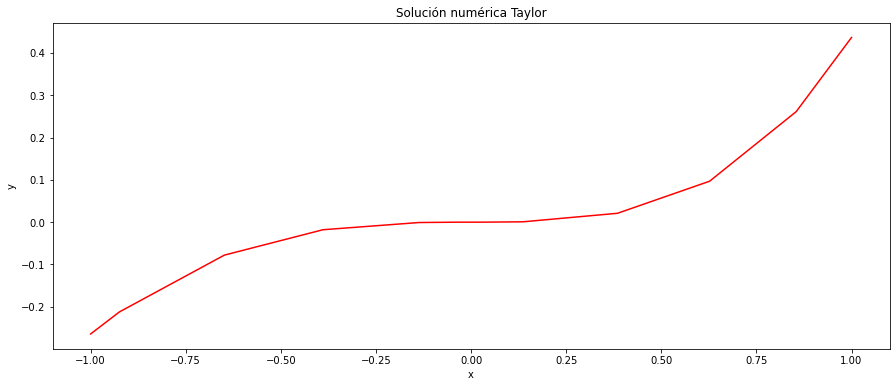

In [108]:
# Opción grafica

DESOLVE_TAYLOR([f,[0,0]],[-1,1],grafica="si") 

DESOLVE_TAYLOR([f,[0,0]],[-1,1],grafica="no") 

DESOLVE_TAYLOR([f,[0,0]],[-1,1],grafica="prueba")     # Da error

In [109]:
# Opción pasos (para paso fijo)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],pasos=2)       # Por defecto, stepsize="variable", da advertencia

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",pasos=2)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",pasos=2.3)     # Da error

Advertencia: no se tendrán en cuenta las opciones:['pasos']


SystemExit: Error: el número de pasos introducido "2.3" no es un entero positivo.

In [110]:
DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",pasos=4//2)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",pasos=int(4/2))

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",pasos=4/2)     # Da error

SystemExit: Error: el número de pasos introducido "2.0" no es un entero positivo.

In [111]:
DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",pasos=-2)     # Da error

SystemExit: Error: el número de pasos introducido "-2" no es un entero positivo.

In [112]:
# Opción hini (para paso variable)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",hini=2)       # Si stepsize="fijo" da advertencia

DESOLVE_TAYLOR([f,[0,0]],[-1,1],hini=1) 

DESOLVE_TAYLOR([f,[0,0]],[-1,1],hini=0.001) 

DESOLVE_TAYLOR([f,[0,0]],[-1,1],hini="1")         # Da error

Advertencia: no se tendrán en cuenta las opciones:['hini']


SystemExit: Error: el hini introducido "1" no es un número.

In [113]:
DESOLVE_TAYLOR([f,[0,0]],[-1,1],hmin=0.001,hini=0.01,hmax=0.1)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],hmin=0.1,hini=0.01,hmax=0.2)         # Da error

SystemExit: Error: el hini introducido "0.01" no se encuentra entre el hmin "0.1" y el hmax "0.2".

In [114]:
DESOLVE_TAYLOR([f,[0,0]],[-1,1],hmin=0.001,hini=0.01,hmax=0.005)         # Da error

SystemExit: Error: el hini introducido "0.01" no se encuentra entre el hmin "0.001" y el hmax "0.005".

In [115]:
# Opción hmax (para paso variable)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",hmax=2)       # Si stepsize="fijo" da advertencia

DESOLVE_TAYLOR([f,[0,0]],[-1,1],hmax=1) 

DESOLVE_TAYLOR([f,[0,0]],[-1,1],hmax="1")         # Da error

Advertencia: no se tendrán en cuenta las opciones:['hmax']


SystemExit: Error: el hmax introducido "1" no es un número.

In [116]:
# Opción hmin (para paso variable)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",hmin=0.02)       # Si stepsize="fijo" da advertencia

DESOLVE_TAYLOR([f,[0,0]],[-1,1],hmin=-1) 

DESOLVE_TAYLOR([f,[0,0]],[-1,1],hmin=0.0001) 

DESOLVE_TAYLOR([f,[0,0]],[-1,1],hmin="1")         # Da error

Advertencia: no se tendrán en cuenta las opciones:['hmin']


SystemExit: Error: el hmin introducido "1" no es un número.

In [117]:
# Opción maxsteps (para paso variable)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",maxsteps=200)       # Si stepsize="fijo" da advertencia

DESOLVE_TAYLOR([f,[0,0]],[-1,1],maxsteps=200)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],maxsteps=200.5)     # Da error

Advertencia: no se tendrán en cuenta las opciones:['maxsteps']


SystemExit: Error: el número máximo de pasos introducido "200.5" no es un entero positivo.

In [118]:
# Opción tolerancia (para paso variable)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",tolerancia=2)       # Si stepsize="fijo" da advertencia

DESOLVE_TAYLOR([f,[0,0]],[-1,1],tolerancia=2)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],tolerancia=2.5)     # Da error

Advertencia: no se tendrán en cuenta las opciones:['tolerancia']


SystemExit: Error: la potencia para la tolerancia introducida "2.5" no es un entero.

In [119]:
# Opción sol (para paso variable)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",sol="n1")       # Si stepsize="fijo" da advertencia

DESOLVE_TAYLOR([f,[0,0]],[-1,1],sol="n1")

DESOLVE_TAYLOR([f,[0,0]],[-1,1],sol="prueba")     # Da error

Advertencia: no se tendrán en cuenta las opciones:['sol']


SystemExit: Error: el sol introducido "prueba" no es "n1".

In [121]:
# Imprimir las derivadas con info=1

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo",info=1)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="variable",info=1)

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="variable",info=1, sol='n1')

Derivadas:
x**2 + y
x**2 + 2*x + y
x**2 + 2*x + y + 2
x**2 + 2*x + y + 2

Número total de pasos: 20 

Derivadas:
x**2 + y
x**2 + 2*x + y
x**2 + 2*x + y + 2
x**2 + 2*x + y + 2
x**2 + 2*x + y + 2

Número total de pasos: 20 

Derivadas:
x**2 + y
x**2 + 2*x + y
x**2 + 2*x + y + 2
x**2 + 2*x + y + 2
x**2 + 2*x + y + 2



array([[-1.00000000e+00, -2.64242410e-01],
       [-9.24384708e-01, -2.12168112e-01],
       [-6.48308182e-01, -7.78286943e-02],
       [-3.89128697e-01, -1.78702526e-02],
       [-1.36500000e-01, -8.19612532e-04],
       [-3.41000000e-02, -1.31053613e-05],
       [-8.50000000e-03, -2.04274067e-07],
       [-2.10000000e-03, -3.08538001e-09],
       [-5.00000000e-04, -4.16614589e-11],
       [-1.00000000e-04, -3.33325000e-13],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e-04,  3.33341667e-13],
       [ 5.00000000e-04,  4.16718755e-11],
       [ 2.10000000e-03,  3.08862136e-09],
       [ 8.50000000e-03,  2.05144079e-07],
       [ 3.41000000e-02,  1.33307230e-05],
       [ 1.36500000e-01,  8.77502188e-04],
       [ 3.84857890e-01,  2.09788244e-02],
       [ 6.26938510e-01,  9.68114086e-02],
       [ 8.54445600e-01,  2.61170738e-01],
       [ 1.00000000e+00,  4.36560055e-01]])

In [122]:
from sympy import Symbol, Expr

x= Symbol('x')
y = Symbol('y')

f = x-y+1
g=y**2
print(type(f))
print(type(g))

# Verifica si f es una función simbólica
if isinstance(f, Expr):
    print('f es una función simbólica')
else:
    print('f no es una función simbólica')
    
# Verifica si g es una función simbólica
if isinstance(g, Expr):
    print('g es una función simbólica')
else:
    print('g no es una función simbólica')

<class 'sympy.core.add.Add'>
<class 'sympy.core.power.Pow'>
f es una función simbólica
g es una función simbólica


In [123]:
# f función simbólica

# Definimos una función que no es simbólica
def f(x,y):
    return x-y+1

DESOLVE_TAYLOR([f,[0,0]],[-1,1],stepsize="fijo")    # Da error

SystemExit: Error: f no es una función simbólica.

In [124]:
# Comprobamos que da error si el número máximo de pasos se alcanza antes de alcanzar el final del intervalo

x= Symbol('x')
y = Symbol('y')
f = x-y+1

DESOLVE_TAYLOR([f,[0,0]],[-1,1],orden=2,stepsize="variable",tolerancia=2,info=4)        # Necesita 4 pasos

# Probamos con 4 pasos como máximo:
DESOLVE_TAYLOR([f,[0,0]],[-1,1],orden=2,stepsize="variable",tolerancia=2,maxsteps=4)    # No da error

# Probamos con 3 pasos como máximo:
DESOLVE_TAYLOR([f,[0,0]],[-1,1],orden=2,stepsize="variable",tolerancia=2,maxsteps=3)    # Da error

Número total de pasos: 4 



SystemExit: Error: el número máximo de pasos "3" se alcanza antes de alcanzar el final del intervalo.

In [125]:
x= Symbol('x')
y = Symbol('y')
rng = [-1,1]
f = -2*x*y**2
pvi = [f,(0,2)]

def sol_ex(x):
    return 2/(1+2*x**2)

S = DESOLVE_TAYLOR(pvi,rng,stepsize='variable',orden=5,info=3,tolerancia=4)

sol_ex(1), sol_ex(-1)

-----------------------------------------------------------------------------
Información de los pasos de la solución numérica con TOL = 0.0001 :
Paso      h             Error            x               y              q
-----------------------------------------------------------------------------
1      0.00010    1.6000000000e-19    0.00010    1.9999999600e+00    4.00000
2      0.00040    1.6383990825e-16    0.00050    1.9999990000e+00    4.00000
3      0.00160    1.6776981120e-13    0.00210    1.9999823602e+00    4.00000
4      0.00640    1.7175626724e-10    0.00850    1.9997110418e+00    4.00000
5      0.02560    1.7521085150e-07    0.03410    1.9953595564e+00    3.20280
6      0.08199    5.5494559251e-05    0.11609    1.9475100525e+00    1.01249
7      0.08302    2.4050407048e-05    0.19911    1.8530789467e+00    1.19679
8      0.09935    4.0722911069e-05    0.29846    1.6975647968e+00    1.07715
---    0.10702    1.1903815912e-04   --------    ----------------    0.86917
9      0.

(0.6666666666666666, 0.6666666666666666)

## Ejercicios

**1.** Aproxima la solución del pvi
$$ y' = y-x^2+1, \qquad  y(0) = 0 $$

en el rango $[0,1]$ usando el método de Taylor con ordenes 2 y 6:  i) con tamaño de paso 0.1 y 0.025;  ii) con cotas de error $10^{-2}$ y $10^{-4}$.

i) Para cada caso, calcula la solución del PVI, realizando la gráfica de la solución y mostrándola también de forma tabulada

ii) Sabiendo que la solución analítica es $ y(x) = (x+1)^2-e^x$ calcula los errores. Muestra en una misma gráfica, los errores que se obtienen con las distintas soluciones en paso fijo y analiza como afecta el orden y el tamaño de paso. Haz lo mismo con las soluciones obtenidas con paso variable, analizando el orden y la tolerancia


Información de los pasos de la solución numérica con h = 0.1 :
      x             y
---------------------------
0.0000000000   0.0000000000   
0.1000000000   0.1050000000   
0.2000000000   0.2189750000   
0.3000000000   0.3407673750   
0.4000000000   0.4690979494   
0.5000000000   0.6025532341   
0.6000000000   0.7395713236   
0.7000000000   0.8784263126   
0.8000000000   1.0172110754   
0.9000000000   1.1538182384   
1.0000000000   1.2859191534   


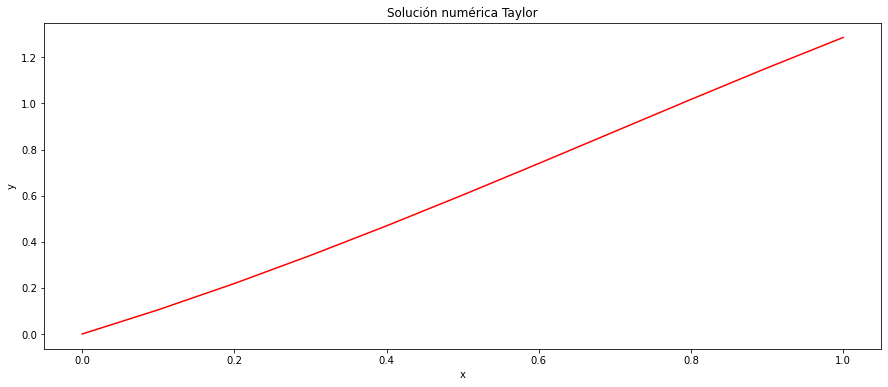

In [126]:
x = Symbol('x')
y = Symbol('y')

f1 = y-x**2+1

# Taylor de orden 2 para paso fijo con tamaño de paso 0.1

T2f1 = DESOLVE_TAYLOR([f1,[0,0]],[0,1],orden=2,stepsize="fijo",pasos=10,grafica="si",info=2)

Información de los pasos de la solución numérica con h = 0.025 :
      x             y
---------------------------
0.0000000000   0.0000000000   
0.0250000000   0.0253125000   
0.0500000000   0.0512342773   
0.0750000000   0.0777491137   
0.1000000000   0.1048403804   
0.1250000000   0.1324910275   
0.1500000000   0.1606835738   
0.1750000000   0.1894000955   
0.2000000000   0.2186222151   
0.2250000000   0.2483310900   
0.2500000000   0.2785074004   
0.2750000000   0.3091313377   
0.3000000000   0.3401825919   
0.3250000000   0.3716403387   
0.3500000000   0.4034832270   
0.3750000000   0.4356893649   
0.4000000000   0.4682363066   
0.4250000000   0.5011010381   
0.4500000000   0.5342599629   
0.4750000000   0.5676888869   
0.5000000000   0.6013630041   
0.5250000000   0.6352568801   
0.5500000000   0.6693444371   
0.5750000000   0.7035989369   
0.6000000000   0.7379929647   
0.6250000000   0.7724984116   
0.6500000000   0.8070864573   
0.6750000000   0.8417275520   
0.7000000000   0.

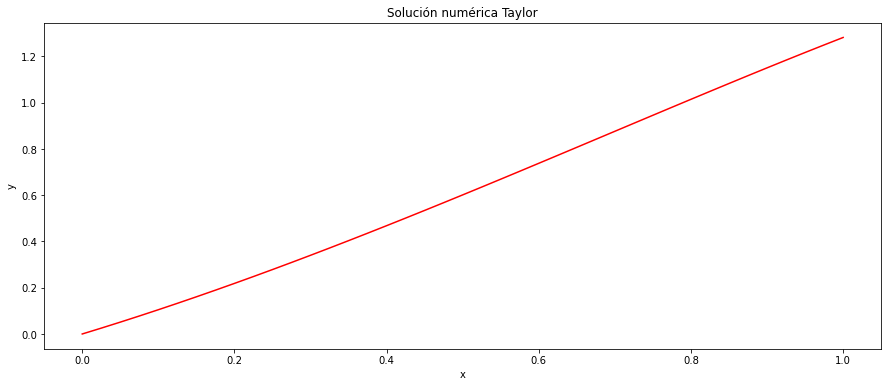

In [127]:
# Taylor de orden 2 para paso fijo con tamaño de paso 0.025

T2f2 = DESOLVE_TAYLOR([f1,[0,0]],[0,1],orden=2,stepsize="fijo",pasos=40,grafica="si",info = 2)

Información de los pasos de la solución numérica con h = 0.1 :
      x             y
---------------------------
0.0000000000   0.0000000000   
0.1000000000   0.1048290819   
0.2000000000   0.2185972419   
0.3000000000   0.3401411925   
0.4000000000   0.4681753025   
0.5000000000   0.6012787294   
0.6000000000   0.7378811998   
0.7000000000   0.8762472928   
0.8000000000   1.0144590718   
0.9000000000   1.1503968892   
1.0000000000   1.2817181720   


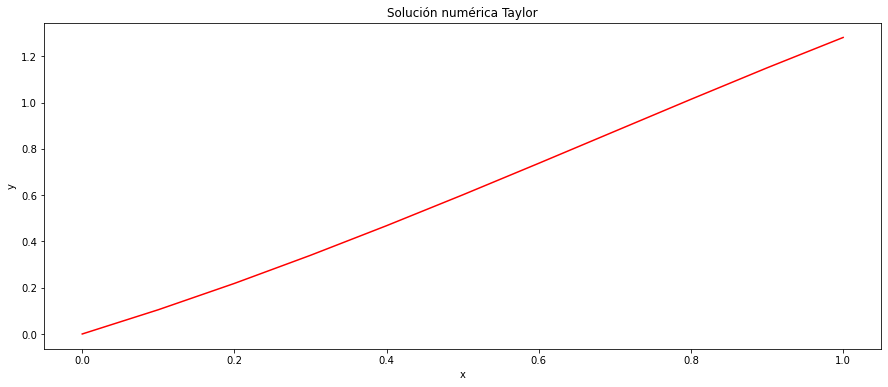

In [129]:
# Taylor de orden 6 para paso fijo con tamaño de paso 0.1

T6f1 = DESOLVE_TAYLOR([f1,[0,0]],[0,1],orden=6,stepsize="fijo",pasos=10,grafica="si",info = 2)

Información de los pasos de la solución numérica con h = 0.025 :
      x             y
---------------------------
0.0000000000   0.0000000000   
0.0250000000   0.0253098795   
0.0500000000   0.0512289036   
0.0750000000   0.0777408491   
0.1000000000   0.1048290819   
0.1250000000   0.1324765469   
0.1500000000   0.1606657573   
0.1750000000   0.1893787834   
0.2000000000   0.2185972418   
0.2250000000   0.2483022838   
0.2500000000   0.2784745833   
0.2750000000   0.3090943251   
0.3000000000   0.3401411924   
0.3250000000   0.3715943540   
0.3500000000   0.4034324514   
0.3750000000   0.4356335854   
0.4000000000   0.4681753024   
0.4250000000   0.5010345803   
0.4500000000   0.5341878145   
0.4750000000   0.5676108025   
0.5000000000   0.6012787293   
0.5250000000   0.6351661516   
0.5500000000   0.6692469821   
0.5750000000   0.7034944731   
0.6000000000   0.7378811996   
0.6250000000   0.7723790426   
0.6500000000   0.8069591710   
0.6750000000   0.8415920240   
0.7000000000   0.

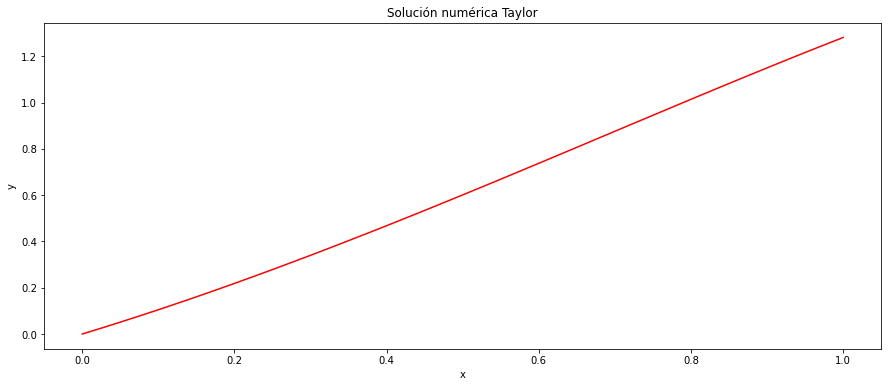

In [130]:
# Taylor de orden 6 para paso fijo con tamaño de paso 0.025

T6f2 = DESOLVE_TAYLOR([f1,[0,0]],[0,1],orden=6,stepsize="fijo",pasos=40,grafica="si", info=2)

-----------------------------------------------------------------------------
Información de los pasos de la solución numérica con TOL = 0.01 :
Paso      h             Error            x               y              q
-----------------------------------------------------------------------------
1      0.00010    1.6666666667e-09    0.00010    1.0000500000e-04    4.00000
2      0.00040    2.6669333467e-08    0.00050    5.0012499000e-04    4.00000
3      0.00160    4.2688005334e-07    0.00210    2.1022041498e-03    4.00000
4      0.00640    6.8410177253e-06    0.00850    8.5360669792e-03    4.00000
5      0.02560    1.1015904548e-04    0.03410    3.4677623557e-02    4.00000
6      0.10240    1.8082434234e-03    0.13650    1.4557057020e-01    2.11648
7      0.21673    8.9719073280e-03    0.35323    4.0986418040e-01    0.95017
8      0.18491    8.1000000000e-03    0.53814    6.5738667342e-01    1.00000
9      0.18491    9.7362703738e-03    0.72305    9.1529216948e-01    0.91211
10      0.1

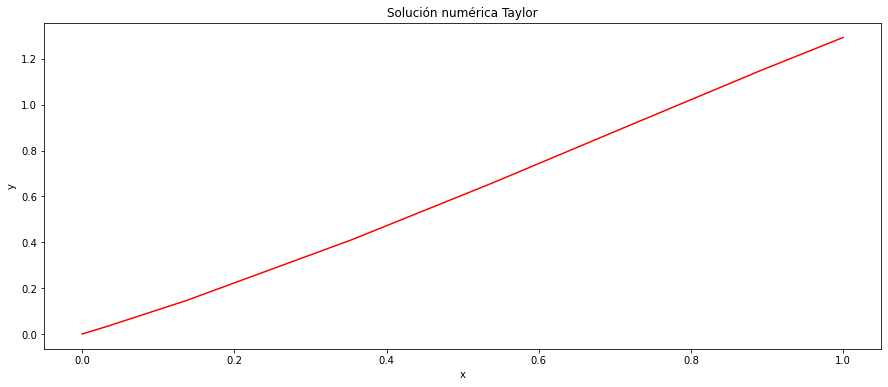

In [131]:
# Taylor de orden 2 para paso variable con cota de error 0.01

T2v1 = DESOLVE_TAYLOR([f1,[0,0]],[0,1],orden=2,stepsize="variable",tolerancia=2,grafica="si",info=2)

-----------------------------------------------------------------------------
Información de los pasos de la solución numérica con TOL = 0.0001 :
Paso      h             Error            x               y              q
-----------------------------------------------------------------------------
1      0.00010    1.6666666667e-09    0.00010    1.0000500000e-04    4.00000
2      0.00040    2.6669333467e-08    0.00050    5.0012499000e-04    4.00000
3      0.00160    4.2688005334e-07    0.00210    2.1022041498e-03    4.00000
4      0.00640    6.8410177253e-06    0.00850    8.5360669792e-03    3.44098
5      0.02202    8.1520058880e-05    0.03052    3.0985151918e-02    0.99681
6      0.02195    8.2803445754e-05    0.05247    5.3830274899e-02    0.98905
7      0.02171    8.2797621439e-05    0.07419    7.6873771303e-02    0.98908
8      0.02147    8.2777726356e-05    0.09566    1.0009379966e-01    0.98920
9      0.02124    8.2758116216e-05    0.11690    1.2347136845e-01    0.98932
10      0

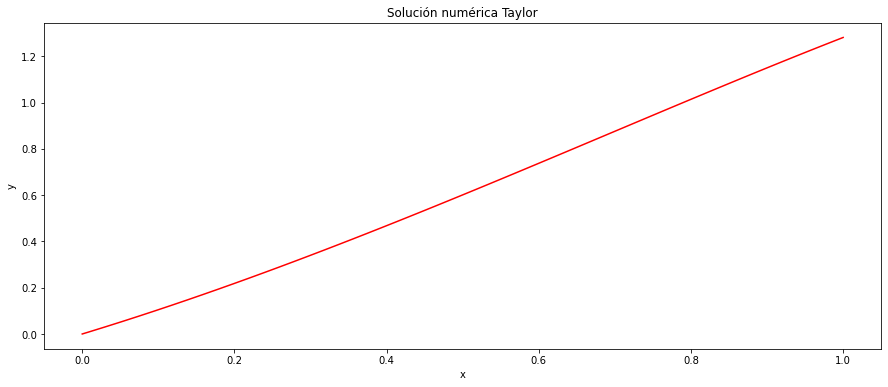

In [132]:
# Taylor de orden 2 para paso variable con cota de error 0.0001

T2v2 = DESOLVE_TAYLOR([f1,[0,0]],[0,1],orden=2,stepsize="variable",tolerancia=4,grafica="si",info=2)

-----------------------------------------------------------------------------
Información de los pasos de la solución numérica con TOL = 0.01 :
Paso      h             Error            x               y              q
-----------------------------------------------------------------------------
1      0.00010    1.9841269841e-28    0.00010    1.0000499983e-04    4.00000
2      0.00040    8.1277968660e-25    0.00050    5.0012497916e-04    4.00000
3      0.00160    3.3304775209e-21    0.00210    2.1022034557e-03    4.00000
4      0.00640    1.3663480014e-17    0.00850    8.5360224280e-03    4.00000
5      0.02560    5.6324942692e-14    0.03410    3.4674739638e-02    4.00000
6      0.10240    2.3668931089e-10    0.13650    1.4537737225e-01    4.00000
7      0.40960    1.0740150031e-06    0.54610    6.6391917818e-01    4.00000
8      0.45390    6.6260879987e-03    1.00000    1.2817203423e+00    0.96390
-----------------------------------------------------------------------------

Número to

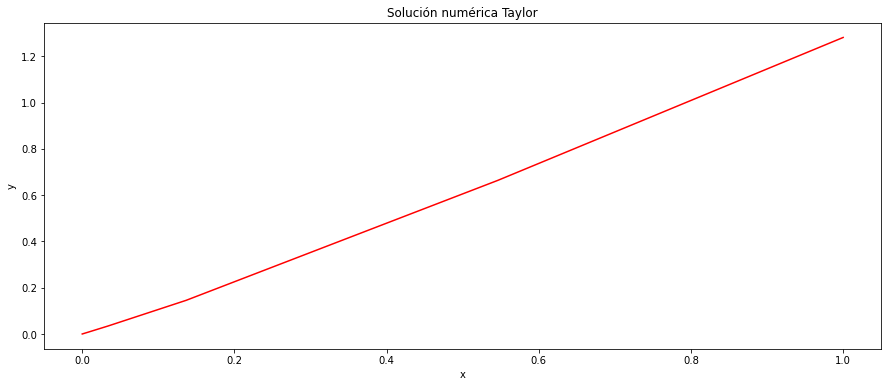

In [133]:
# Taylor de orden 6 para paso variable con cota de error 0.01

T6v1 = DESOLVE_TAYLOR([f1,[0,0]],[0,1],orden=6,stepsize="variable",tolerancia=2,grafica="si",info=2)

-----------------------------------------------------------------------------
Información de los pasos de la solución numérica con TOL = 0.0001 :
Paso      h             Error            x               y              q
-----------------------------------------------------------------------------
1      0.00010    1.9841269841e-28    0.00010    1.0000499983e-04    4.00000
2      0.00040    8.1277968660e-25    0.00050    5.0012497916e-04    4.00000
3      0.00160    3.3304775209e-21    0.00210    2.1022034557e-03    4.00000
4      0.00640    1.3663480014e-17    0.00850    8.5360224280e-03    4.00000
5      0.02560    5.6324942692e-14    0.03410    3.4674739638e-02    4.00000
6      0.10240    2.3668931089e-10    0.13650    1.4537737225e-01    4.00000
7      0.40960    1.0740150031e-06    0.54610    6.6391917818e-01    1.91605
8      0.45390    8.0046428579e-05    1.00000    1.2817203423e+00    0.93401
-----------------------------------------------------------------------------

Número 

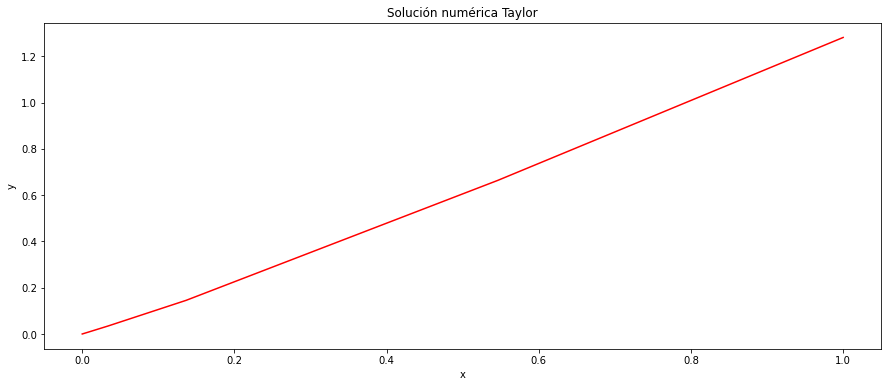

In [134]:
# Taylor de orden 6 para paso variable con cota de error 0.0001

T6v2 = DESOLVE_TAYLOR([f1,[0,0]],[0,1],orden=6,stepsize="variable",tolerancia=4,grafica="si",info=2)

In [135]:
# Solución exacta

def f1_sol(x):
    return (x+1)**2-np.exp(x)

f1_sol(1)

1.281718171540955

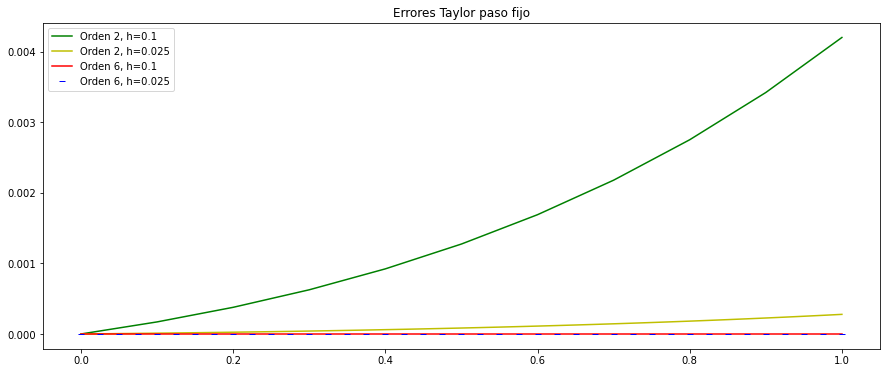

In [136]:
# Paso fijo

SolExf1 = f1_sol(T2f1[:,0])
SolExf2 = f1_sol(T2f2[:,0])

E2f1 = abs(T2f1[:,1]-SolExf1)
E2f2 = abs(T2f2[:,1]-SolExf2)
E6f1 = abs(T6f1[:,1]-SolExf1)
E6f2 = abs(T6f2[:,1]-SolExf2)

plt.figure(figsize=(15,6))

plt.plot(T2f1[:,0],E2f1,'g',label='Orden 2, h=0.1')
plt.plot(T2f2[:,0],E2f2,'y',label='Orden 2, h=0.025')
plt.plot(T6f1[:,0],E6f1,'r',label='Orden 6, h=0.1')
plt.plot(T6f2[:,0],E6f2,'b_',label='Orden 6, h=0.025')
plt.title('Errores Taylor paso fijo')
plt.legend(loc='best')

Observamos que las soluciones calculadas con orden 2 tienen errores mayores que las de orden 6, es decir, el error disminuye al aumentar el orden.

Por otro lado, para las de orden 2 se tiene que con $h=0.1$ se obtienen errores mayores que con $h=0.025$, y para las de orden 6 se obtienen errores muy similares para ambos tamaños de paso, aunque con $h=0.025$ son un poco menores. Por tanto, al disminuir el tamaño de paso disminuye el error.

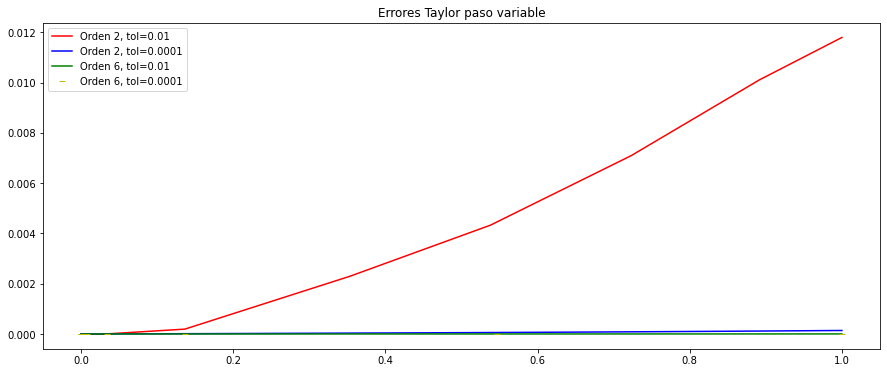

In [86]:
# Paso variable

SolEx2v1 = f1_sol(T2v1[:,0])
SolEx2v2 = f1_sol(T2v2[:,0])
SolEx6v1 = f1_sol(T6v1[:,0])
SolEx6v2 = f1_sol(T6v2[:,0])

E2v1 = abs(T2v1[:,1]-SolEx2v1)
E2v2 = abs(T2v2[:,1]-SolEx2v2)
E6v1 = abs(T6v1[:,1]-SolEx6v1)
E6v2 = abs(T6v2[:,1]-SolEx6v2)

plt.figure(figsize=(15,6))

plt.plot(T2v1[:,0],E2v1,'r',label='Orden 2, tol=0.01')
plt.plot(T2v2[:,0],E2v2,'b',label='Orden 2, tol=0.0001')
plt.plot(T6v1[:,0],E6v1,'g',label='Orden 6, tol=0.01')
plt.plot(T6v2[:,0],E6v2,'y_',label='Orden 6, tol=0.0001')
plt.title('Errores Taylor paso variable')
plt.legend(loc='best')

En este caso, los errores menores se obtienen para orden 6. Además, cuanto menor es la tolerancia, menor es el error, ya que por ejemplo para orden 2 y tolerancia $0.01$ los errores son mayores que con tolerancia $0.0001$. Para orden 6, se obtienen errores similares para ambas tolerancias, aunque un poco menores para tolerancia $0.0001$.

**2.** Usar Taylor con ordenes n= 2, 3 y 4, dar una aproximación de $y(0.1)$ para el pvi 
$$ y' = x - y^2,\qquad   y(0) = 1 $$
tal que sea correcta hasta la cuarta cifra decimal. 

Compara los resultados que se obtienen con paso variable utilizando orden=3, orden=4 y orden=3 pero obteniendo la solución de orden 4 (utilizando la opción soln1=True).

In [137]:
x = Symbol('x')
y = Symbol('y')

f2 = x-y**2

T2 = DESOLVE_TAYLOR([f2,[0,1]],[0,0.1],orden=2,stepsize="variable",tolerancia=4)
T3 = DESOLVE_TAYLOR([f2,[0,1]],[0,0.1],orden=3,stepsize="variable",tolerancia=4)
T4 = DESOLVE_TAYLOR([f2,[0,1]],[0,0.1],orden=4,stepsize="variable",tolerancia=4)
T3n1 = DESOLVE_TAYLOR([f2,[0,1]],[0,0.1],orden=3,stepsize="variable",tolerancia=4,sol='n1')

print('Aproximación con orden 2:',T2[-1,1])
print('Aproximación con orden 3:',T3[-1,1])
print('Aproximación con orden 4:',T4[-1,1])
print('Aproximación con orden 3 pero solución de orden 4:',T3n1[-1,1])
print()

print('Comparación orden 3 con orden 4:',abs(T3[-1,1]-T4[-1,1]))
print('Comparación orden 3 con orden 3 y solución de orden 4:',abs(T3[-1,1]-T3n1[-1,1]))
print('Comparación orden 4 con orden 3 y solución de orden 4:',abs(T4[-1,1]-T3n1[-1,1]))

Aproximación con orden 2: 0.9138009941271685
Aproximación con orden 3: 0.9137910476303854
Aproximación con orden 4: 0.9137957981590045
Aproximación con orden 3 pero solución de orden 4: 0.91379444729063

Comparación orden 3 con orden 4: 4.750528619035244e-06
Comparación orden 3 con orden 3 y solución de orden 4: 3.3996602445407476e-06
Comparación orden 4 con orden 3 y solución de orden 4: 1.350868374494496e-06


En la aproximación de orden 3 y en la de orden 3 pero con solución de orden 4 se tiene que la estimación del error se hace para el método de orden 3 en ambas, aunque en la segunda se obtiene la solución de orden 4. Observamos que la diferencia entre la de orden 4 y la de orden 3 y solución de orden 4 es la menor, pues en ambas se obtiene la solución de orden 4. Las que más se diferencian son la de orden 3 y la de orden 4, ya que son soluciones de órdenes distintos.

**3.** Usando los métodos de Taylor de ordenes 4, 3 y 2 resolver el pvi 
$$ y' = (x - y)/2, \qquad y(0) = 1 $$
en  $[0, 3]$.  

i) Comparar las soluciones obtenidas para  $h = 10^{-1}$, $10^{-2}$, $10^{-3}$, y $10^{-4}$,  con la solución exacta $y(x) = x + 3 e^{-x/2} - 2$.

ii) Comparar las soluciones del apartado anterior con las soluciones que se obtienen con paso variable imponiendo una tolerancia del mismo orden que el error global de las soluciones obtenidas en el apartado anterior. 

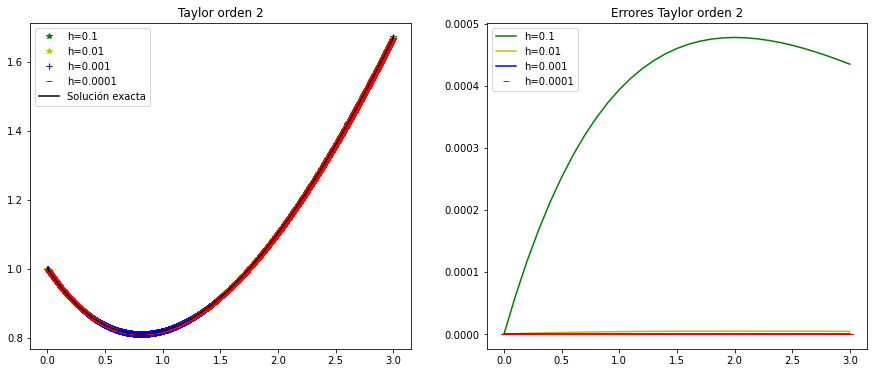

In [56]:
x = Symbol('x')
y = Symbol('y')

f3 = (x-y)/2

def f3_sol(x):
    return x+3*np.exp(-x/2)-2

# Orden 2

T2f1 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=2,stepsize="fijo",pasos=30)
T2f2 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=2,stepsize="fijo",pasos=300)
T2f3 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=2,stepsize="fijo",pasos=3000)
T2f4 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=2,stepsize="fijo",pasos=30000)

SolEx1 = f3_sol(T2f1[:,0])
SolEx2 = f3_sol(T2f2[:,0])
SolEx3 = f3_sol(T2f3[:,0])
SolEx4 = f3_sol(T2f4[:,0])

E2f1 = abs(T2f1[:,1]-SolEx1)
E2f2 = abs(T2f2[:,1]-SolEx2)
E2f3 = abs(T2f3[:,1]-SolEx3)
E2f4 = abs(T2f4[:,1]-SolEx4)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(T2f1[:,0],T2f1[:,1],'*g',label='h=0.1')
plt.plot(T2f2[:,0],T2f2[:,1],'*y',label='h=0.01')
plt.plot(T2f3[:,0],T2f3[:,1],'+b',label='h=0.001')
plt.plot(T2f4[:,0],T2f4[:,1],'_r',label='h=0.0001')
plt.plot(T2f4[:,0],SolEx4,'k',label='Solución exacta')
plt.title('Taylor orden 2')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(T2f1[:,0],E2f1,'g',label='h=0.1')
plt.plot(T2f2[:,0],E2f2,'y',label='h=0.01')
plt.plot(T2f3[:,0],E2f3,'b',label='h=0.001')
plt.plot(T2f4[:,0],E2f4,'_r',label='h=0.0001')
plt.title('Errores Taylor orden 2')
plt.legend(loc='best')

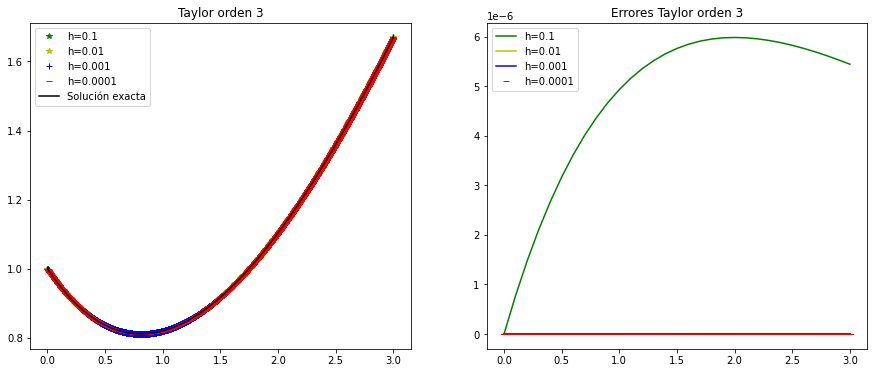

In [57]:
# Orden 3

T3f1 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=3,stepsize="fijo",pasos=30)
T3f2 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=3,stepsize="fijo",pasos=300)
T3f3 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=3,stepsize="fijo",pasos=3000)
T3f4 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=3,stepsize="fijo",pasos=30000)

E3f1 = abs(T3f1[:,1]-SolEx1)
E3f2 = abs(T3f2[:,1]-SolEx2)
E3f3 = abs(T3f3[:,1]-SolEx3)
E3f4 = abs(T3f4[:,1]-SolEx4)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(T3f1[:,0],T3f1[:,1],'*g',label='h=0.1')
plt.plot(T3f2[:,0],T3f2[:,1],'*y',label='h=0.01')
plt.plot(T3f3[:,0],T3f3[:,1],'+b',label='h=0.001')
plt.plot(T3f4[:,0],T3f4[:,1],'_r',label='h=0.0001')
plt.plot(T3f4[:,0],SolEx4,'k',label='Solución exacta')
plt.title('Taylor orden 3')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(T3f1[:,0],E3f1,'g',label='h=0.1')
plt.plot(T3f2[:,0],E3f2,'y',label='h=0.01')
plt.plot(T3f3[:,0],E3f3,'b',label='h=0.001')
plt.plot(T3f4[:,0],E3f4,'_r',label='h=0.0001')
plt.title('Errores Taylor orden 3')
plt.legend(loc='best')

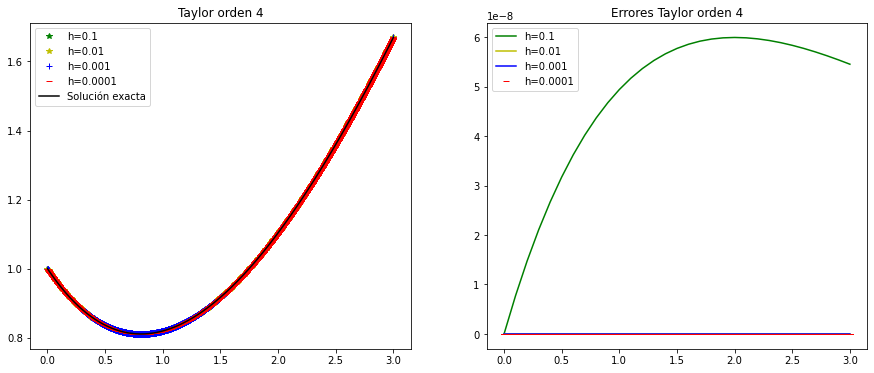

In [58]:
# Orden 4

T4f1 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=4,stepsize="fijo",pasos=30)
T4f2 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=4,stepsize="fijo",pasos=300)
T4f3 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=4,stepsize="fijo",pasos=3000)
T4f4 = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=4,stepsize="fijo",pasos=30000)

E4f1 = abs(T4f1[:,1]-SolEx1)
E4f2 = abs(T4f2[:,1]-SolEx2)
E4f3 = abs(T4f3[:,1]-SolEx3)
E4f4 = abs(T4f4[:,1]-SolEx4)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(T4f1[:,0],T4f1[:,1],'*g',label='h=0.1')
plt.plot(T4f2[:,0],T4f2[:,1],'*y',label='h=0.01')
plt.plot(T4f3[:,0],T4f3[:,1],'+b',label='h=0.001')
plt.plot(T4f4[:,0],T4f4[:,1],'_r',label='h=0.0001')
plt.plot(T4f4[:,0],SolEx4,'k',label='Solución exacta')
plt.title('Taylor orden 4')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(T4f1[:,0],E4f1,'g',label='h=0.1')
plt.plot(T4f2[:,0],E4f2,'y',label='h=0.01')
plt.plot(T4f3[:,0],E4f3,'b',label='h=0.001')
plt.plot(T4f4[:,0],E4f4,'_r',label='h=0.0001')
plt.title('Errores Taylor orden 4')
plt.legend(loc='best')

Para el método de Taylor de orden n, el error global es un $O(h^n)$, es decir, es de orden $n$. Por tanto, tomaremos una tolerancia de $10^{-n}$, para $n = 2,3,4$.

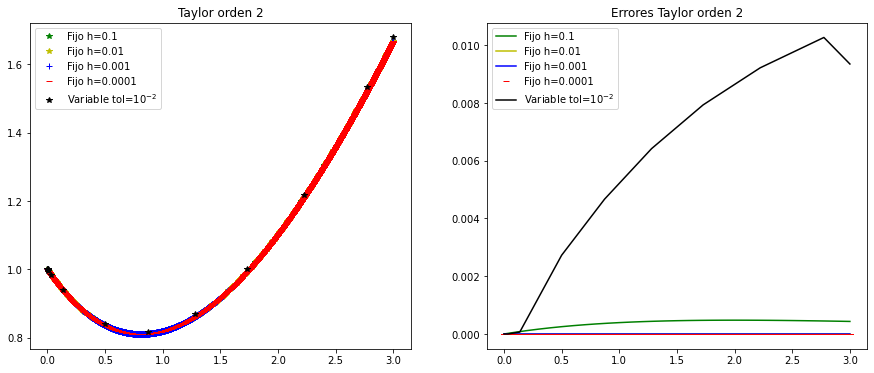

In [64]:
# Orden 2

T2v = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=2,stepsize="variable",tolerancia=2)

SolEx2v = f3_sol(T2v[:,0])

E2v = abs(T2v[:,1]-SolEx2v)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(T2f1[:,0],T2f1[:,1],'*g',label='Fijo h=0.1')
plt.plot(T2f2[:,0],T2f2[:,1],'*y',label='Fijo h=0.01')
plt.plot(T2f3[:,0],T2f3[:,1],'+b',label='Fijo h=0.001')
plt.plot(T2f4[:,0],T2f4[:,1],'_r',label='Fijo h=0.0001')
plt.plot(T2v[:,0],T2v[:,1],'*k',label='Variable tol=$10^{-2}$')
plt.title('Taylor orden 2')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(T2f1[:,0],E2f1,'g',label='Fijo h=0.1')
plt.plot(T2f2[:,0],E2f2,'y',label='Fijo h=0.01')
plt.plot(T2f3[:,0],E2f3,'b',label='Fijo h=0.001')
plt.plot(T2f4[:,0],E2f4,'_r',label='Fijo h=0.0001')
plt.plot(T2v[:,0],E2v,'k',label='Variable tol=$10^{-2}$')
plt.title('Errores Taylor orden 2')
plt.legend(loc='best')

Vemos que los errores para paso variable van aumentando a lo largo del intervalo, y son mayores que para paso fijo con cualquiera de los $h$ considerados. Sin embargo, al dar el último paso el error con paso variable disminuye. Esto puede deberse al ajuste del tamaño de paso que hacemos al dar el último paso para acabar justamente en $b$.

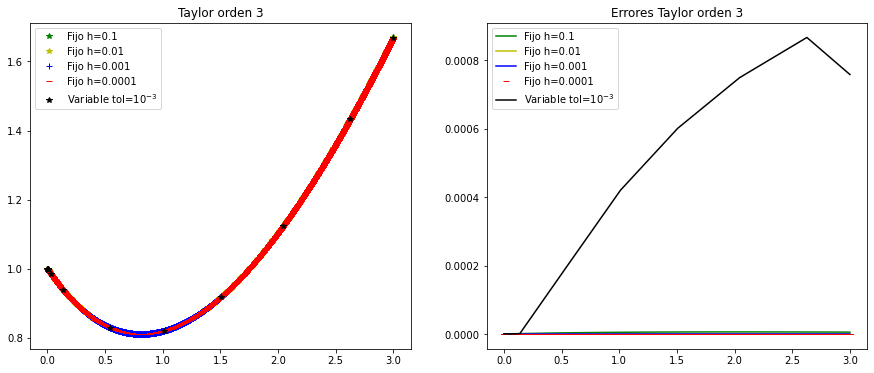

In [66]:
# Orden 3

T3v = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=3,stepsize="variable",tolerancia=3)

SolEx3v = f3_sol(T3v[:,0])

E3v = abs(T3v[:,1]-SolEx3v)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(T3f1[:,0],T3f1[:,1],'*g',label='Fijo h=0.1')
plt.plot(T3f2[:,0],T3f2[:,1],'*y',label='Fijo h=0.01')
plt.plot(T3f3[:,0],T3f3[:,1],'+b',label='Fijo h=0.001')
plt.plot(T3f4[:,0],T3f4[:,1],'_r',label='Fijo h=0.0001')
plt.plot(T3v[:,0],T3v[:,1],'*k',label='Variable tol=$10^{-3}$')
plt.title('Taylor orden 3')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(T3f1[:,0],E3f1,'g',label='Fijo h=0.1')
plt.plot(T3f2[:,0],E3f2,'y',label='Fijo h=0.01')
plt.plot(T3f3[:,0],E3f3,'b',label='Fijo h=0.001')
plt.plot(T3f4[:,0],E3f4,'_r',label='Fijo h=0.0001')
plt.plot(T3v[:,0],E3v,'k',label='Variable tol=$10^{-3}$')
plt.title('Errores Taylor orden 3')
plt.legend(loc='best')

En este caso, los errores son más pequeños, aunque de nuevo para paso variable son mayores que para paso fijo. Además, al igual que ocurría para orden 2, en el último paso disminuye el error.

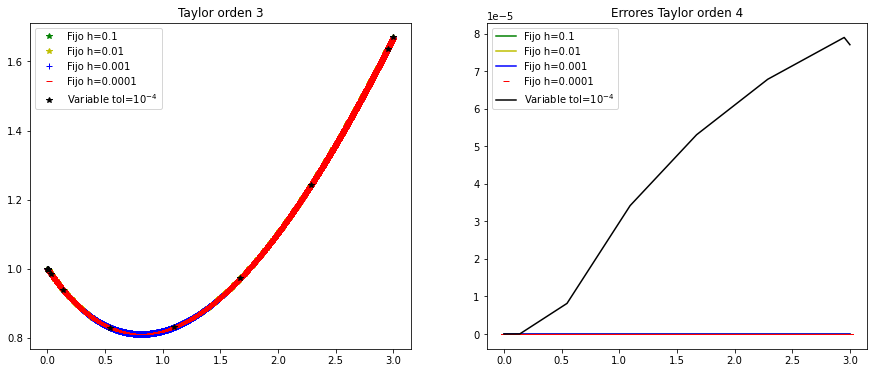

In [67]:
# Orden 4

T4v = DESOLVE_TAYLOR([f3,[0,1]],[0,3],orden=4,stepsize="variable",tolerancia=4)

SolEx4v = f3_sol(T4v[:,0])

E4v = abs(T4v[:,1]-SolEx4v)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(T4f1[:,0],T4f1[:,1],'*g',label='Fijo h=0.1')
plt.plot(T4f2[:,0],T4f2[:,1],'*y',label='Fijo h=0.01')
plt.plot(T4f3[:,0],T4f3[:,1],'+b',label='Fijo h=0.001')
plt.plot(T4f4[:,0],T4f4[:,1],'_r',label='Fijo h=0.0001')
plt.plot(T4v[:,0],T4v[:,1],'*k',label='Variable tol=$10^{-4}$')
plt.title('Taylor orden 3')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(T4f1[:,0],E4f1,'g',label='Fijo h=0.1')
plt.plot(T4f2[:,0],E4f2,'y',label='Fijo h=0.01')
plt.plot(T4f3[:,0],E4f3,'b',label='Fijo h=0.001')
plt.plot(T4f4[:,0],E4f4,'_r',label='Fijo h=0.0001')
plt.plot(T4v[:,0],E4v,'k',label='Variable tol=$10^{-4}$')
plt.title('Errores Taylor orden 4')
plt.legend(loc='best')

Los errores son menores que en los dos casos anteriores. De nuevo, los errores para paso variable van aumentando a lo largo del intervalo de forma irregular, y son mayores que para paso fijo. Además, al dar el último paso, el error para paso variable también disminuye.